In [2]:
import networkit as nk
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
import matplotlib as mpl
def latex_plot(scale = 1, fontsize = 12):
    """ Changes the size of a figure and fonts for the publication-quality plots. """
    fig_width_pt = 246.0
    inches_per_pt = 1.0/72.27
    golden_mean = (np.sqrt(5.0)-1.0)/2.0
    fig_width = fig_width_pt*inches_per_pt*scale
    fig_height = fig_width*golden_mean
    fig_size = [fig_width, fig_height]
    eps_with_latex = {
        "pgf.texsystem": "pdflatex", "text.usetex": True, "font.family": "serif", "font.serif": [], "font.sans-serif": [], "font.monospace": [], "axes.labelsize": fontsize, "font.size": fontsize, "legend.fontsize": fontsize, "xtick.labelsize": 12, "ytick.labelsize": 12, "figure.figsize": fig_size
        }
    mpl.rcParams.update(eps_with_latex)

# Facebook graph

### Loading the network

In [35]:
# load facebook.metis

path_to_graph = 'networks/facebook_snap.txt'
snapReader = nk.graphio.SNAPGraphReader(False, True, 4039)
G = snapReader.read(path_to_graph)

### Degree distribution

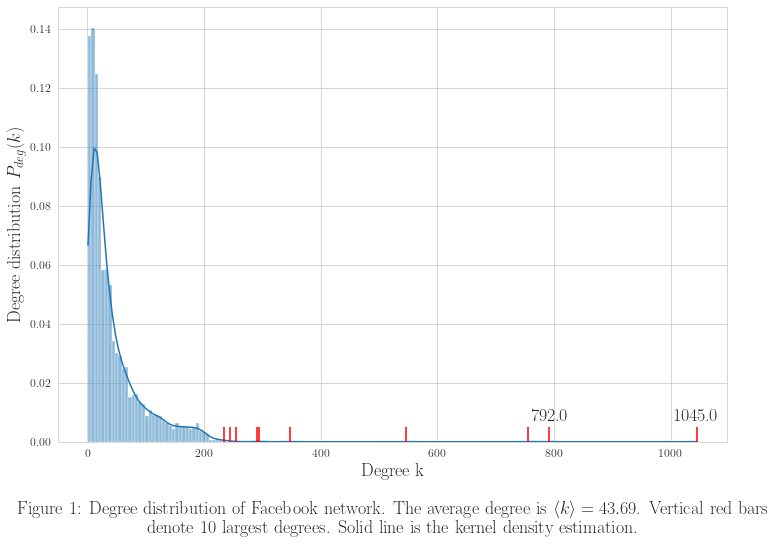

In [36]:
latex_plot(fontsize=18)
# degree distribution of G
deg = nk.centrality.DegreeCentrality(G)
deg.run()

degrees = np.array(deg.scores())
avg_degree = np.mean(degrees)

# plot degree distribution with seaborn

plt.figure(figsize=(12, 8))
sb.histplot(degrees, kde=True, stat='probability')
plt.ylabel('Degree distribution $P_{deg}(k)$')
# plt.title('Degree distribution of Facebook network, average degree = {:.2f}'.format(avg_degree))

# show top 10 nodes with highest degree on the plot

top10 = np.argsort(degrees)[-10:]
cnt = 0
for i in np.flip(top10):
    if cnt < 2:
        plt.annotate(degrees[i], (degrees[i], 0), xytext=(0, 18), textcoords='offset points', ha='center', va='bottom')
    cnt += 1
    plt.vlines(degrees[i], 0, 0.005, color='red')

plt.xlabel(r'''Degree k
           
 Figure 1: Degree distribution of Facebook network. The average degree is $ \langle k \rangle = {:.2f} $. Vertical red bars
 denote 10 largest degrees. Solid line is the kernel density estimation. '''.format(avg_degree))
plt.show()

# deg.ranking()[:100]



### Clustering coefficient

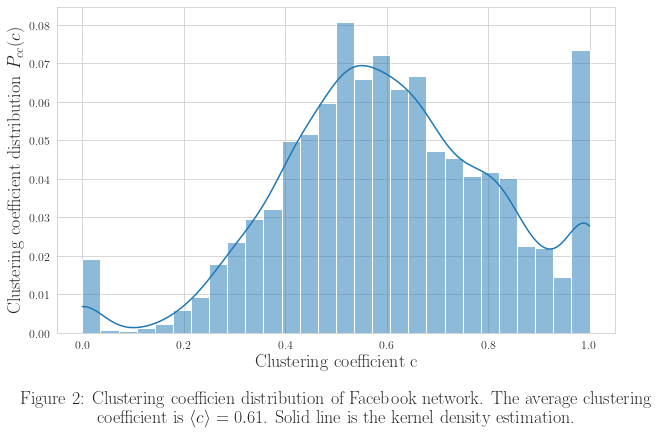

In [37]:
lcc = nk.centrality.LocalClusteringCoefficient(G, turbo=True)
lcc.run()
cc = np.array(lcc.scores())

avg_cc= np.mean(cc)

plt.figure(figsize=(10, 6))
sb.histplot(cc, kde=True, stat='probability')
plt.ylabel('Clustering coefficient distribution $P_{cc}(c)$')

plt.xlabel(r'''Clustering coefficient c
           
 Figure 2: Clustering coefficien distribution of Facebook network. The average clustering
 coefficient is $ \langle c \rangle = {:.2f} $. Solid line is the kernel density estimation. '''.format(avg_cc))
plt.show()

### Paths

In [38]:
# Diameter of G
diam = nk.distance.Diameter(G)
diam.run()
diameter = diam.getDiameter()
print(diameter)

(8, 0)


In [39]:
# All pairwise shortest paths
shortest_paths_alg = nk.distance.APSP(G)
shortest_paths_alg.run()

shortest_paths = shortest_paths_alg.getDistances(asarray=True)
# cast to int
shortest_paths = shortest_paths.astype(int)

In [40]:
# Average shortest path length
avg_shortest_path = np.mean(shortest_paths[shortest_paths != np.inf])
print(avg_shortest_path)

3.691592636562027


In [41]:
# longest shortest path = diameter
longest_shortest_path = np.max(shortest_paths)
print(longest_shortest_path)

8


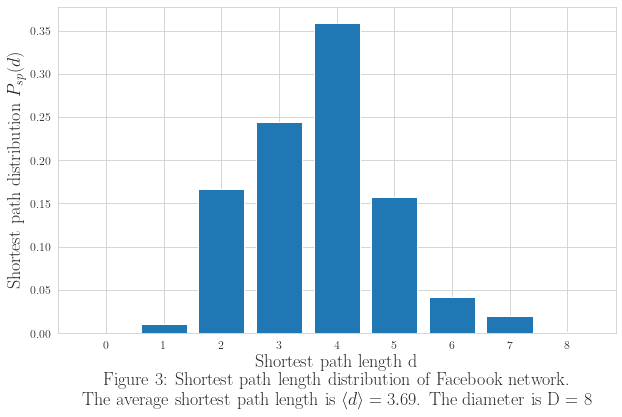

In [42]:
# histogram of shortest paths with bins centered at integers

plt.figure(figsize=(10, 6))

labels, counts = np.unique(shortest_paths.flatten(), return_counts=True)
plt.bar(labels, counts/np.sum(counts), align='center', width=0.8)
plt.gca().set_xticks(labels)
plt.ylabel('Shortest path distribution $P_{sp}(d)$')

plt.xlabel(r'''Shortest path length d
 Figure 3: Shortest path length distribution of Facebook network.
 The average shortest path length is $ \langle d\rangle = {:.2f} $. The diameter is D = {}'''.format(avg_shortest_path, diameter[0]))
plt.show()

### Visualizing the network
Visual representation of Facebook social circles graph. Nodes' color correspond to the community structure, whereas node size is proportional to the logarithm of betweeness centrality. See `fb_network_graph.py` for code used to generate this figure.

![Visualization of the Facebook network](networks/fb_network_full.jpg)

# Artificial graphs

### Erdős-Rényi-Gilbert random graph G(N,p)

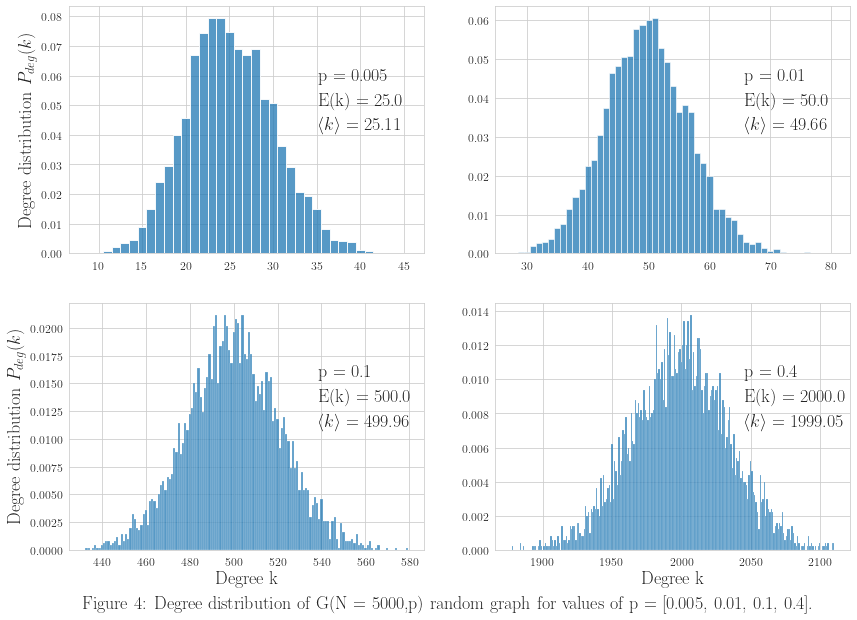

In [43]:

N = 5000
p = [0.005,0.01,0.1,0.4]

latex_plot(fontsize=18)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axes = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]

for i, ax in enumerate(axes):
    G = nx.fast_gnp_random_graph(N, p[i])
    degrees = np.array(list(dict(G.degree()).values()))
    expected_avg_degree = p[i]*N
    true_avg_degree = np.mean(degrees)
    sb.histplot(degrees, ax=ax, stat='probability', discrete=True)
    if i in [0,2]:
        ax.set_ylabel('Degree distribution $P_{deg}(k)$')
    else:
        ax.set_ylabel('')
    if i in [2,3]:
        ax.set_xlabel('Degree k')
    ax.text(0.7,0.7, "p = {}".format(p[i]), transform=ax.transAxes)
    ax.text(0.7,0.6, "E(k) = {}".format(expected_avg_degree), transform=ax.transAxes)
    ax.text(0.7,0.5, r"$\langle k \rangle$ = {:.2f}".format(true_avg_degree), transform=ax.transAxes)
plt.text(0.5, 0.05, 'Figure 4: Degree distribution of G(N = 5000,p) random graph for values of p = {}.'.format(p), ha='center', va='center', transform=fig.transFigure)
plt.show()

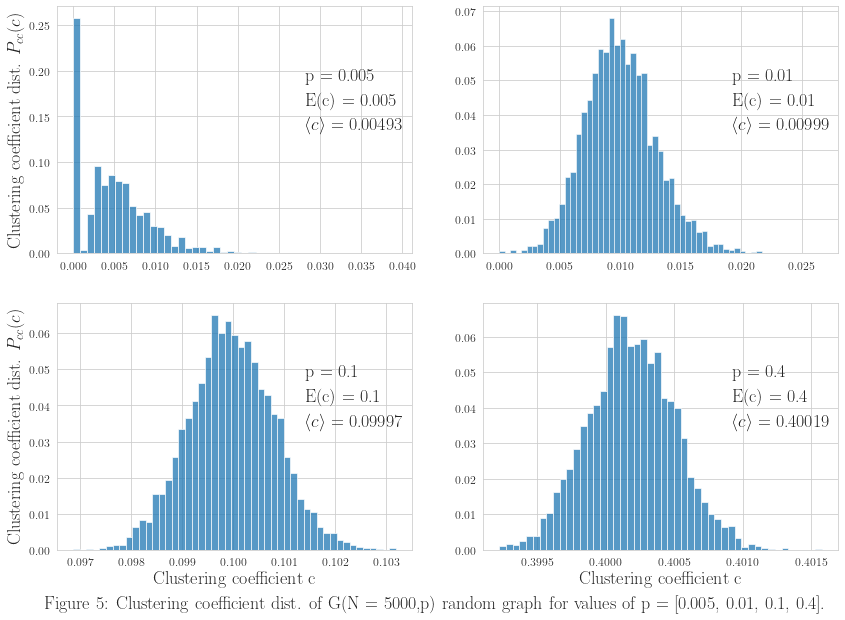

In [44]:

N = 5000
p = [0.005,0.01,0.1,0.4]

latex_plot(fontsize=18)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axes = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]

for i, ax in enumerate(axes):
    G = nx.fast_gnp_random_graph(N, p[i])
    Gnk = nk.nxadapter.nx2nk(G)
    lcc = nk.centrality.LocalClusteringCoefficient(Gnk, turbo=True)
    lcc.run()
    cc = np.array(lcc.scores())
    expected_avg_cc = p[i]
    true_avg_cc = np.mean(cc)
    sb.histplot(cc, ax=ax, stat='probability')
    if i in [0,2]:
        ax.set_ylabel('Clustering coefficient dist. $P_{cc}(c)$')
    else:
        ax.set_ylabel('')
    if i in [2,3]:
        ax.set_xlabel('Clustering coefficient c')
    ax.text(0.7,0.7, "p = {}".format(p[i]), transform=ax.transAxes)
    ax.text(0.7,0.6, "E(c) = {}".format(expected_avg_cc), transform=ax.transAxes)
    ax.text(0.7,0.5, r"$\langle c \rangle$ = {:.5f}".format(true_avg_cc), transform=ax.transAxes)
plt.text(0.5, 0.05, 'Figure 5: Clustering coefficient dist. of G(N = 5000,p) random graph for values of p = {}.'.format(p), ha='center', va='center', transform=fig.transFigure)
plt.show()

In [45]:
threshold = np.log(N)/N
print("p threshold for connectedness for G(N,p) = log(N)/N = {}".format(threshold))

p threshold for connectedness for G(N,p) = log(N)/N = 0.0017034386382832477


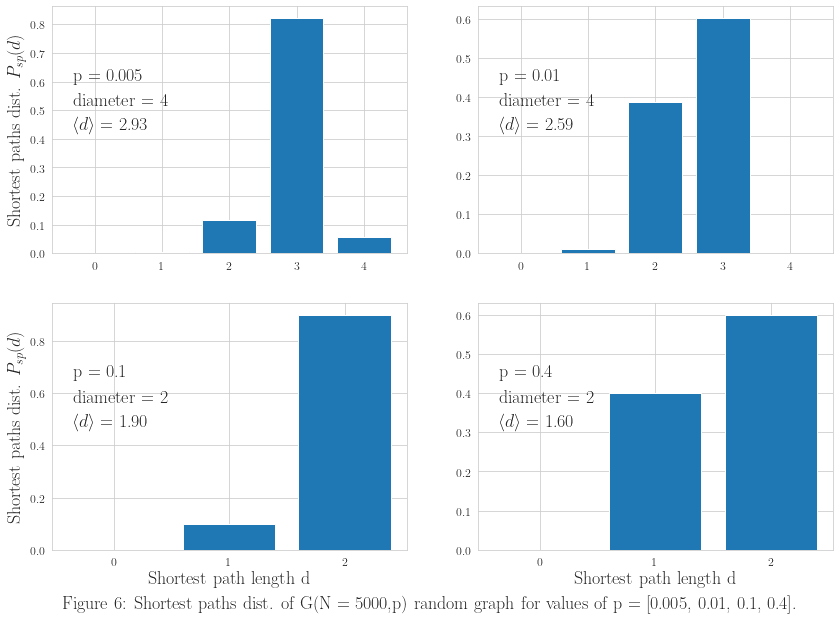

In [46]:

N = 5000
p = [0.005,0.01,0.1,0.4]

latex_plot(fontsize=18)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axes = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]

for i, ax in enumerate(axes):
    G = nx.fast_gnp_random_graph(N, p[i])
    Gnk = nk.nxadapter.nx2nk(G)

    shortest_paths_alg = nk.distance.APSP(Gnk)
    shortest_paths_alg.run()
    shortest_paths = shortest_paths_alg.getDistances(asarray=True)
    shortest_paths = shortest_paths[shortest_paths != np.inf]
    shortest_paths = shortest_paths.astype(int)
    true_avg_sp = np.mean(shortest_paths)
    diameter = np.max(shortest_paths)
    labels, counts = np.unique(shortest_paths.flatten(), return_counts=True)
    ax.bar(labels, counts/np.sum(counts), align='center', width=0.8)
    ax.set_xticks(labels)
    # sb.histplot(cc, ax=ax, stat='probability')
    if i in [0,2]:
        ax.set_ylabel('Shortest paths dist. $P_{sp}(d)$')
    else:
        ax.set_ylabel('')
    if i in [2,3]:
        ax.set_xlabel('Shortest path length d')
    ax.text(0.06,0.7, "p = {}".format(p[i]), transform=ax.transAxes)
    ax.text(0.06,0.6, "diameter = {}".format(diameter), transform=ax.transAxes)
    ax.text(0.06,0.5, r"$\langle d \rangle$ = {:.2f}".format(true_avg_sp), transform=ax.transAxes)
plt.text(0.5, 0.05, 'Figure 6: Shortest paths dist. of G(N = 5000,p) random graph for values of p = {}.'.format(p), ha='center', va='center', transform=fig.transFigure)
plt.show()

### Erdős-Rényi random graph G(N,L)

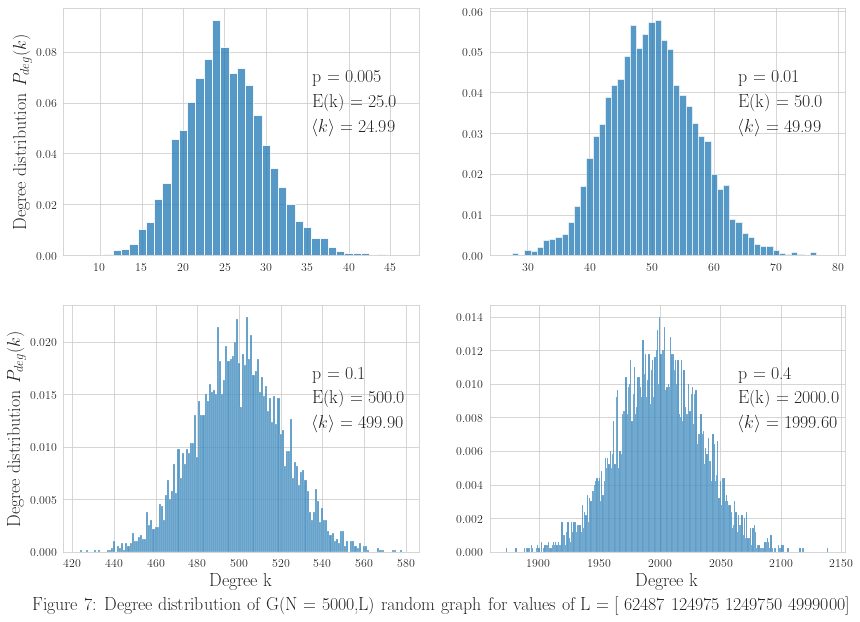

In [47]:

N = 5000
p = [0.005,0.01,0.1,0.4]
L = N*(N-1)/2 * np.array(p)
L = L.astype(int)

latex_plot(fontsize=18)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axes = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]

for i, ax in enumerate(axes):
    G = nx.dense_gnm_random_graph(N, L[i])
    degrees = np.array(list(dict(G.degree()).values()))
    expected_avg_degree = p[i]*N
    true_avg_degree = np.mean(degrees)
    sb.histplot(degrees, ax=ax, stat='probability', discrete=True)
    if i in [0,2]:
        ax.set_ylabel('Degree distribution $P_{deg}(k)$')
    else:
        ax.set_ylabel('')
    if i in [2,3]:
        ax.set_xlabel('Degree k')
    ax.text(0.7,0.7, "p = {}".format(p[i]), transform=ax.transAxes)
    ax.text(0.7,0.6, "E(k) = {}".format(expected_avg_degree), transform=ax.transAxes)
    ax.text(0.7,0.5, r"$\langle k \rangle$ = {:.2f}".format(true_avg_degree), transform=ax.transAxes)
plt.text(0.5, 0.05, 'Figure 7: Degree distribution of G(N = 5000,L) random graph for values of L = {}'.format(L), ha='center', va='center', transform=fig.transFigure)
plt.show()

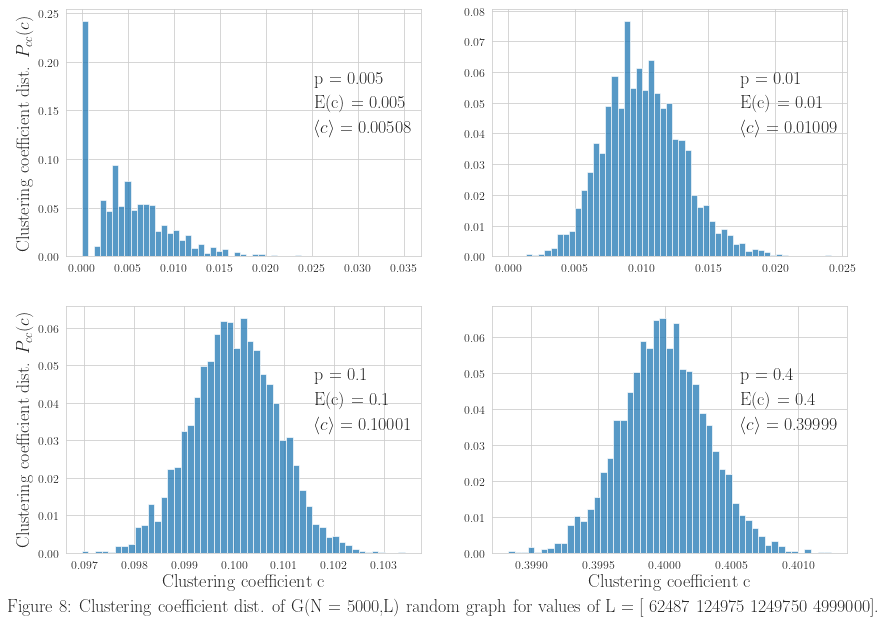

In [48]:

N = 5000
p = [0.005,0.01,0.1,0.4]
L = N*(N-1)/2 * np.array(p)
L = L.astype(int)

latex_plot(fontsize=18)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axes = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]

for i, ax in enumerate(axes):
    G = nx.dense_gnm_random_graph(N, L[i])
    Gnk = nk.nxadapter.nx2nk(G)
    lcc = nk.centrality.LocalClusteringCoefficient(Gnk, turbo=True)
    lcc.run()
    cc = np.array(lcc.scores())
    expected_avg_cc = p[i]
    true_avg_cc = np.mean(cc)
    sb.histplot(cc, ax=ax, stat='probability')
    if i in [0,2]:
        ax.set_ylabel('Clustering coefficient dist. $P_{cc}(c)$')
    else:
        ax.set_ylabel('')
    if i in [2,3]:
        ax.set_xlabel('Clustering coefficient c')
    ax.text(0.7,0.7, "p = {}".format(p[i]), transform=ax.transAxes)
    ax.text(0.7,0.6, "E(c) = {}".format(expected_avg_cc), transform=ax.transAxes)
    ax.text(0.7,0.5, r"$\langle c \rangle$ = {:.5f}".format(true_avg_cc), transform=ax.transAxes)
plt.text(0.5, 0.05, 'Figure 8: Clustering coefficient dist. of G(N = 5000,L) random graph for values of L = {}.'.format(L), ha='center', va='center', transform=fig.transFigure)
plt.show()

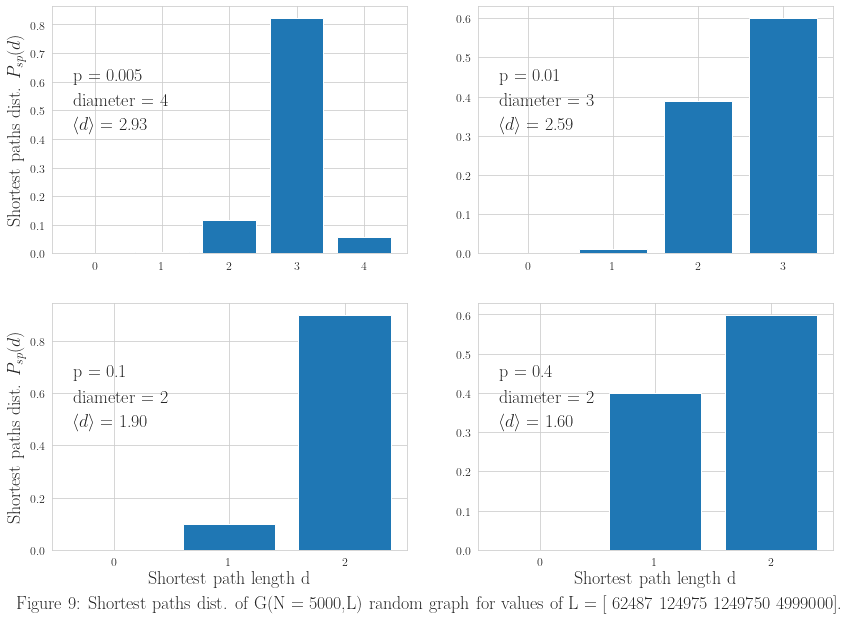

In [49]:

N = 5000
p = [0.005,0.01,0.1,0.4]
L = N*(N-1)/2 * np.array(p)
L = L.astype(int)

latex_plot(fontsize=18)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axes = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]

for i, ax in enumerate(axes):
    G = nx.dense_gnm_random_graph(N, L[i])
    Gnk = nk.nxadapter.nx2nk(G)

    shortest_paths_alg = nk.distance.APSP(Gnk)
    shortest_paths_alg.run()
    shortest_paths = shortest_paths_alg.getDistances(asarray=True)
    shortest_paths = shortest_paths[shortest_paths != np.inf]
    shortest_paths = shortest_paths.astype(int)
    true_avg_sp = np.mean(shortest_paths)
    diameter = np.max(shortest_paths)
    labels, counts = np.unique(shortest_paths.flatten(), return_counts=True)
    ax.bar(labels, counts/np.sum(counts), align='center', width=0.8)
    ax.set_xticks(labels)
    # sb.histplot(cc, ax=ax, stat='probability')
    if i in [0,2]:
        ax.set_ylabel('Shortest paths dist. $P_{sp}(d)$')
    else:
        ax.set_ylabel('')
    if i in [2,3]:
        ax.set_xlabel('Shortest path length d')
    ax.text(0.06,0.7, "p = {}".format(p[i]), transform=ax.transAxes)
    ax.text(0.06,0.6, "diameter = {}".format(diameter), transform=ax.transAxes)
    ax.text(0.06,0.5, r"$\langle d \rangle$ = {:.2f}".format(true_avg_sp), transform=ax.transAxes)
plt.text(0.5, 0.05, 'Figure 9: Shortest paths dist. of G(N = 5000,L) random graph for values of L = {}.'.format(L), ha='center', va='center', transform=fig.transFigure)
plt.show()

### Watts-Strogatz small-world graph

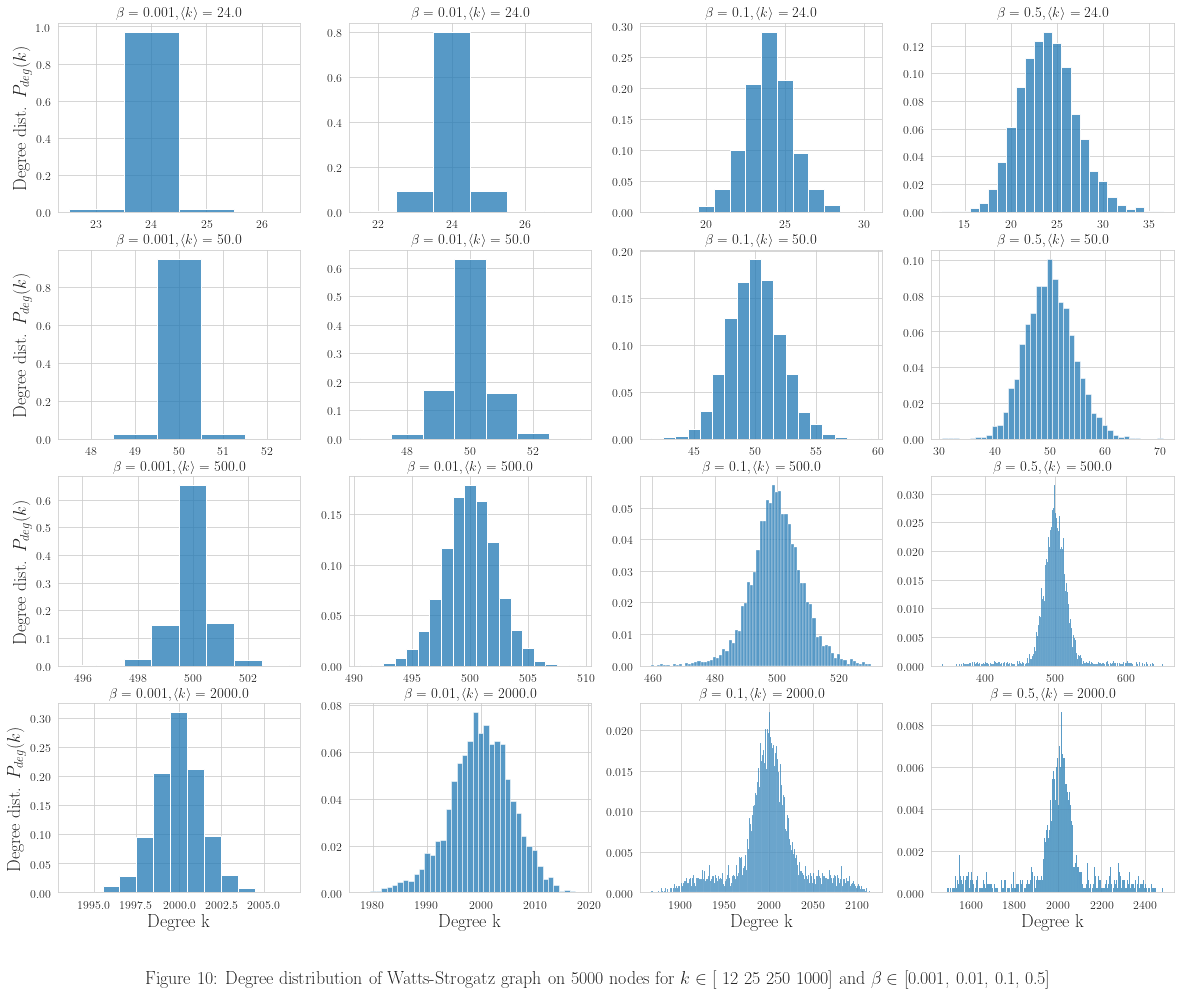

In [50]:

N = 5000
p = [0.005,0.01,0.1,0.4]
k = N*np.array(p)
k = k.astype(int)//2
beta = [0.001,0.01, 0.1, 0.5]

latex_plot(fontsize=18)
fig, ax = plt.subplots(4, 4, figsize=(20, 16))

for i in range(4):
    for j in range(4):
        G = nk.generators.WattsStrogatzGenerator(N, k[i], beta[j]).generate()
        deg = nk.centrality.DegreeCentrality(G)
        deg.run()
        degrees = np.array(deg.scores())
        avg_degree = np.mean(degrees)
        sb.histplot(degrees, ax=ax[i,j], stat='probability', discrete=True)
        if j == 0:
            ax[i,j].set_ylabel('Degree dist. $P_{deg}(k)$')
        else:
            ax[i,j].set_ylabel('')
        if i == 3 :
            ax[i,j].set_xlabel('Degree k')
            
        ax[i,j].set_title(r'$\beta = {}, \langle k \rangle = {}$'.format(beta[j], avg_degree), fontsize=14)
        # ax[i,j].text(0.7,0.7, "p = {}".format(p[i]), transform=ax[i,j].transAxes)
        # ax[i,j].text(0.7,0.6, r"$\beta = {}$".format(beta[j]), transform=ax[i,j].transAxes)
        # ax[i,j].text(0.7,0.5, r"$\langle k \rangle$ = {:.2f}".format(avg_degree), transform=ax[i,j].transAxes)
plt.text(0.5, 0.05, r'Figure 10: Degree distribution of Watts-Strogatz graph on {} nodes for $k \in$ {} and $\beta \in $ {}'.format(N,k,beta), ha='center', va='center', transform=fig.transFigure)
plt.show()

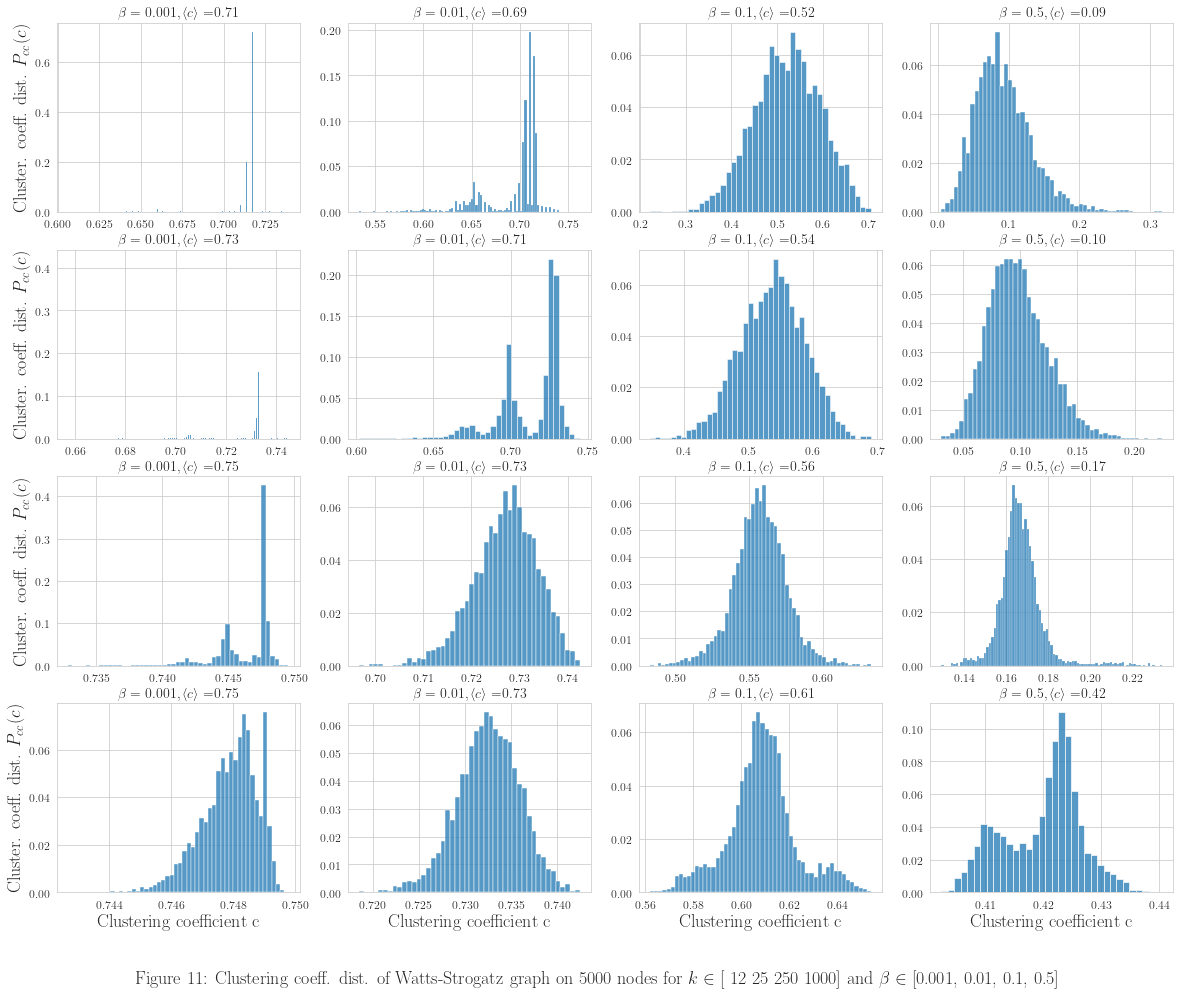

In [51]:

N = 5000
p = [0.005,0.01,0.1,0.4]
k = N*np.array(p)
k = k.astype(int)//2
beta = [0.001,0.01, 0.1, 0.5]

latex_plot(fontsize=18)
fig, ax = plt.subplots(4, 4, figsize=(20, 16))

for i in range(4):
    for j in range(4):
        G = nk.generators.WattsStrogatzGenerator(N, k[i], beta[j]).generate()
        lcc = nk.centrality.LocalClusteringCoefficient(G, turbo=True)
        lcc.run()
        cc = np.array(lcc.scores())
        true_avg_cc = np.mean(cc)
        sb.histplot(cc, ax=ax[i,j], stat='probability')
        if j == 0:
            ax[i,j].set_ylabel('Cluster. coeff. dist. $P_{cc}(c)$')
        else:
            ax[i,j].set_ylabel('')
        if i == 3 :
            ax[i,j].set_xlabel('Clustering coefficient c')
            
        ax[i,j].set_title(r'$\beta = {}, \langle c \rangle = ${:.2f}'.format(beta[j], true_avg_cc), fontsize=14)
        # ax[i,j].text(0.7,0.7, "p = {}".format(p[i]), transform=ax[i,j].transAxes)
        # ax[i,j].text(0.7,0.6, r"$\beta = {}$".format(beta[j]), transform=ax[i,j].transAxes)
        # ax[i,j].text(0.7,0.5, r"$\langle k \rangle$ = {:.2f}".format(avg_degree), transform=ax[i,j].transAxes)
plt.text(0.5, 0.05, r'Figure 11: Clustering coeff. dist. of Watts-Strogatz graph on {} nodes for $k \in$ {} and $\beta \in $ {}'.format(N,k,beta), ha='center', va='center', transform=fig.transFigure)
plt.show()

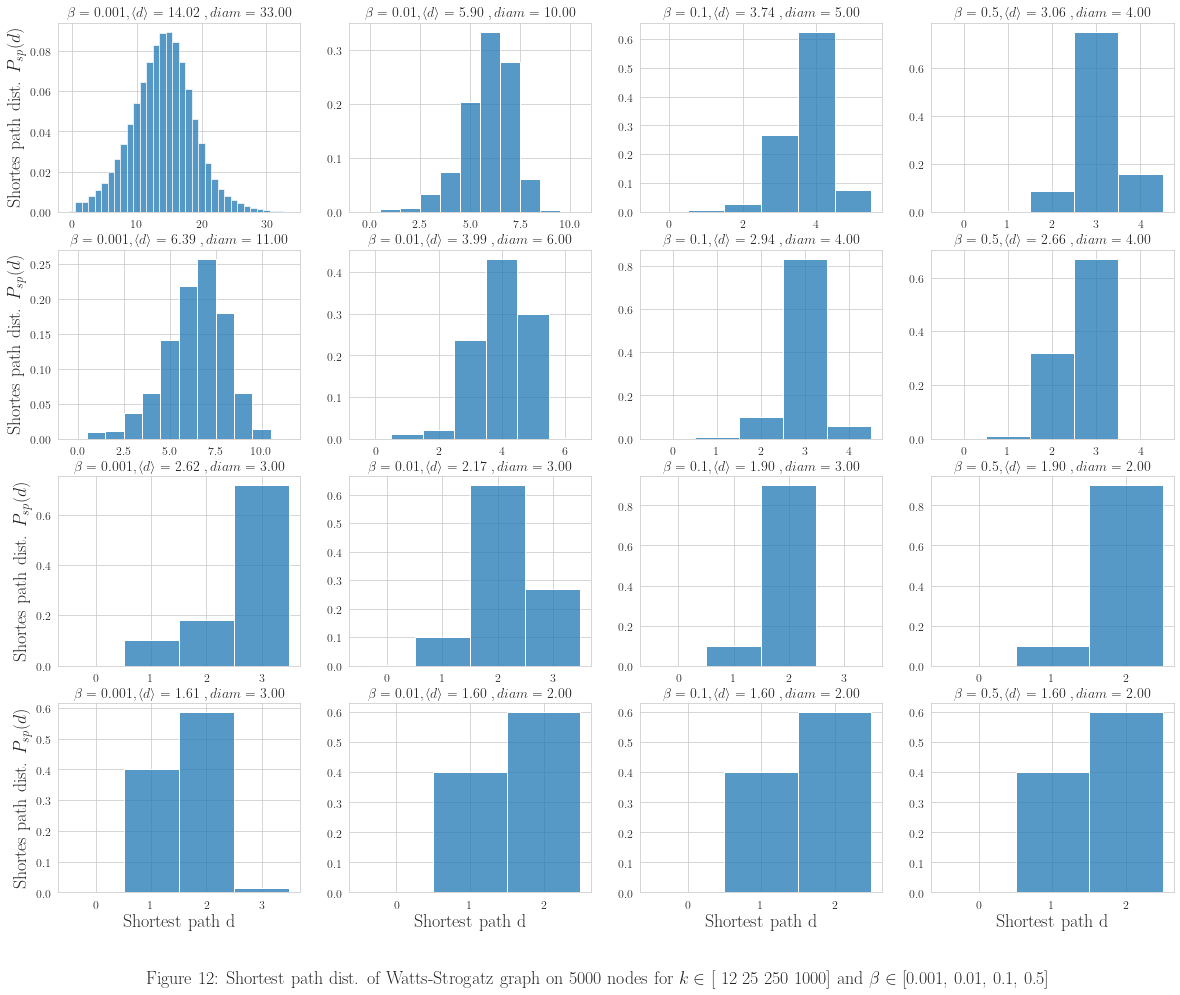

In [52]:

N = 5000
p = [0.005,0.01,0.1,0.4]
k = N*np.array(p)
k = k.astype(int)//2
beta = [0.001,0.01, 0.1, 0.5]

latex_plot(fontsize=18)
fig, ax = plt.subplots(4, 4, figsize=(20, 16))

for i in range(4):
    for j in range(4):
        G = nk.generators.WattsStrogatzGenerator(N, k[i], beta[j]).generate()
        shortest_paths_alg = nk.distance.APSP(G)
        shortest_paths_alg.run()
        shortest_paths = shortest_paths_alg.getDistances(asarray=True)
        shortest_paths = shortest_paths[shortest_paths != np.inf]
        # shortest_paths = shortest_paths.astype(int)
        true_avg_sp = np.mean(shortest_paths)
        diameter = np.max(shortest_paths)
        # labels, counts = np.unique(shortest_paths.flatten(), return_counts=True)
        # # bins = np.arange(0, np.max(shortest_paths)+1)
        sb.histplot(shortest_paths, ax=ax[i,j], stat='probability', discrete=True)
        # ax[i,j].bar(labels, counts/np.sum(counts), align='center', width=0.8)
        # ax[i,j].set_xticks(labels)
        if j == 0:
            ax[i,j].set_ylabel('Shortes path dist. $P_{sp}(d)$')
        else:
            ax[i,j].set_ylabel('')
        if i == 3 :
            ax[i,j].set_xlabel('Shortest path d')
            
        ax[i,j].set_title(r'$\beta = {}, \langle d \rangle = $ {:.2f} $, diam = $ {:.2f}'.format(beta[j], true_avg_sp.round(2), int(diameter)), fontsize=14)
        # ax[i,j].text(0.7,0.7, "p = {}".format(p[i]), transform=ax[i,j].transAxes)
        # ax[i,j].text(0.7,0.6, r"$\beta = {}$".format(beta[j]), transform=ax[i,j].transAxes)
        # ax[i,j].text(0.7,0.5, r"$\langle k \rangle$ = {:.2f}".format(avg_degree), transform=ax[i,j].transAxes)
plt.text(0.5, 0.05, r'Figure 12: Shortest path dist. of Watts-Strogatz graph on {} nodes for $k \in$ {} and $\beta \in $ {}'.format(N,k,beta), ha='center', va='center', transform=fig.transFigure)
plt.show()

## Own G(N,p) and Watts-Strogatz graph

### G(N,p)

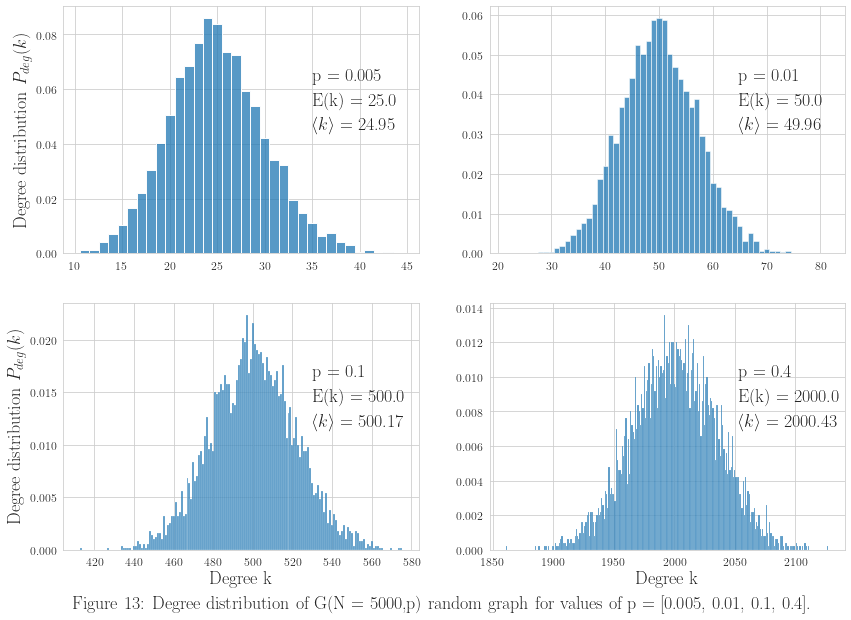

In [53]:
N = 5000
p = [0.005,0.01,0.1,0.4]

folder_path = 'networks/'
graph_name = 'erdos_renyi_p_{:.6f}.txt'
latex_plot(fontsize=18)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axes = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]

for i, ax in enumerate(axes):
    # G = nx.fast_gnp_random_graph(N, p[i])
    G = nx.read_adjlist(folder_path + graph_name.format(p[i]), nodetype=int)
    degrees = np.array(list(dict(G.degree()).values()))
    expected_avg_degree = p[i]*N
    true_avg_degree = np.mean(degrees)
    sb.histplot(degrees, ax=ax, stat='probability', discrete=True)
    if i in [0,2]:
        ax.set_ylabel('Degree distribution $P_{deg}(k)$')
    else:
        ax.set_ylabel('')
    if i in [2,3]:
        ax.set_xlabel('Degree k')
    ax.text(0.7,0.7, "p = {}".format(p[i]), transform=ax.transAxes)
    ax.text(0.7,0.6, "E(k) = {}".format(expected_avg_degree), transform=ax.transAxes)
    ax.text(0.7,0.5, r"$\langle k \rangle$ = {:.2f}".format(true_avg_degree), transform=ax.transAxes)
plt.text(0.5, 0.05, 'Figure 13: Degree distribution of G(N = 5000,p) random graph for values of p = {}.'.format(p), ha='center', va='center', transform=fig.transFigure)
plt.show()

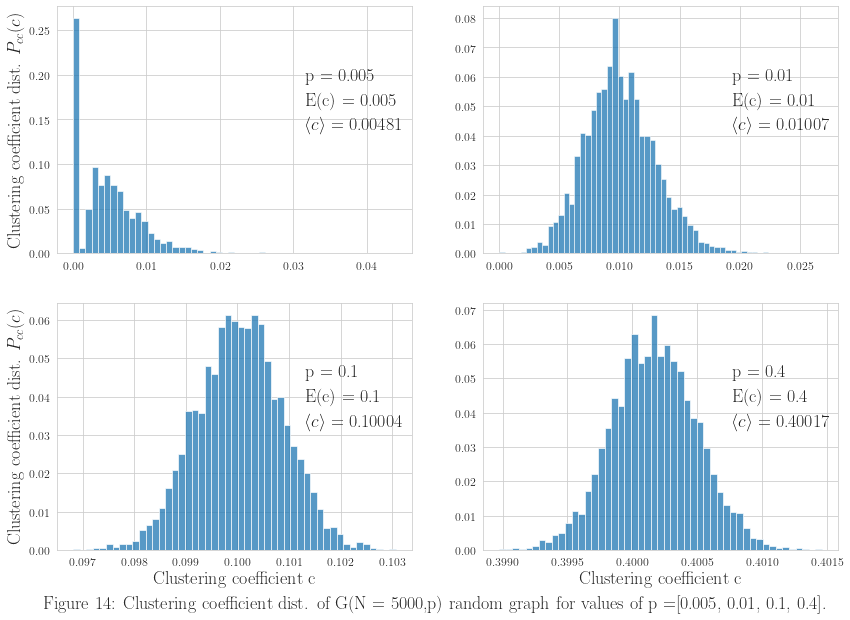

In [54]:

N = 5000
p = [0.005,0.01,0.1,0.4]

latex_plot(fontsize=18)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axes = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]

for i, ax in enumerate(axes):
    # G = nx.fast_gnp_random_graph(N, p[i])
    G = nx.read_adjlist(folder_path + graph_name.format(p[i]), nodetype=int)
    Gnk = nk.nxadapter.nx2nk(G)
    lcc = nk.centrality.LocalClusteringCoefficient(Gnk, turbo=True)
    lcc.run()
    cc = np.array(lcc.scores())
    expected_avg_cc = p[i]
    true_avg_cc = np.mean(cc)
    sb.histplot(cc, ax=ax, stat='probability')
    if i in [0,2]:
        ax.set_ylabel('Clustering coefficient dist. $P_{cc}(c)$')
    else:
        ax.set_ylabel('')
    if i in [2,3]:
        ax.set_xlabel('Clustering coefficient c')
    ax.text(0.7,0.7, "p = {}".format(p[i]), transform=ax.transAxes)
    ax.text(0.7,0.6, "E(c) = {}".format(expected_avg_cc), transform=ax.transAxes)
    ax.text(0.7,0.5, r"$\langle c \rangle$ = {:.5f}".format(true_avg_cc), transform=ax.transAxes)
plt.text(0.5, 0.05, 'Figure 14: Clustering coefficient dist. of G(N = 5000,p) random graph for values of p ={}.'.format(p), ha='center', va='center', transform=fig.transFigure)
plt.show()

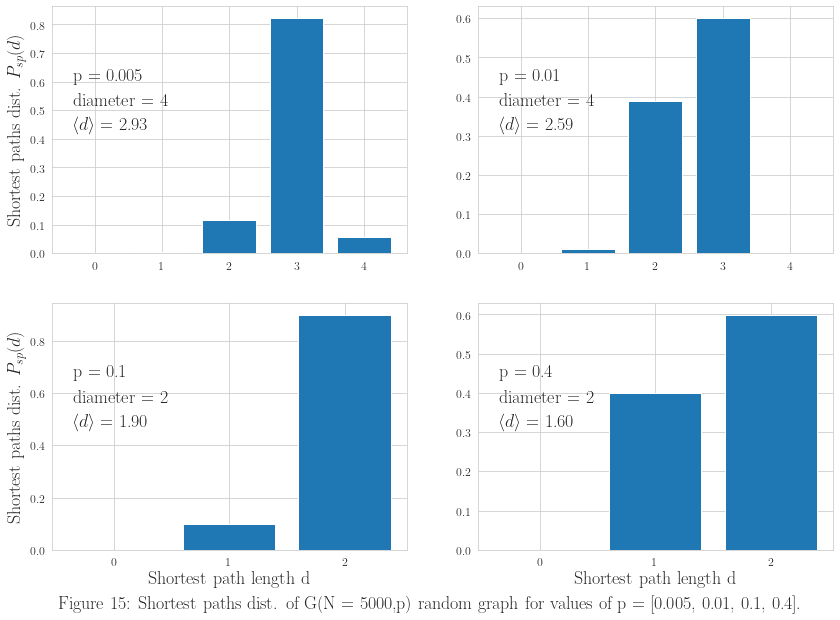

In [55]:

N = 5000
p = [0.005,0.01,0.1,0.4]

latex_plot(fontsize=18)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axes = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]

for i, ax in enumerate(axes):
    # G = nx.fast_gnp_random_graph(N, p[i])
    G = nx.read_adjlist(folder_path + graph_name.format(p[i]), nodetype=int)
    Gnk = nk.nxadapter.nx2nk(G)

    shortest_paths_alg = nk.distance.APSP(Gnk)
    shortest_paths_alg.run()
    shortest_paths = shortest_paths_alg.getDistances(asarray=True)
    shortest_paths = shortest_paths[shortest_paths != np.inf]
    shortest_paths = shortest_paths.astype(int)
    true_avg_sp = np.mean(shortest_paths)
    diameter = np.max(shortest_paths)
    labels, counts = np.unique(shortest_paths.flatten(), return_counts=True)
    ax.bar(labels, counts/np.sum(counts), align='center', width=0.8)
    ax.set_xticks(labels)
    # sb.histplot(cc, ax=ax, stat='probability')
    if i in [0,2]:
        ax.set_ylabel('Shortest paths dist. $P_{sp}(d)$')
    else:
        ax.set_ylabel('')
    if i in [2,3]:
        ax.set_xlabel('Shortest path length d')
    ax.text(0.06,0.7, "p = {}".format(p[i]), transform=ax.transAxes)
    ax.text(0.06,0.6, "diameter = {}".format(diameter), transform=ax.transAxes)
    ax.text(0.06,0.5, r"$\langle d \rangle$ = {:.2f}".format(true_avg_sp), transform=ax.transAxes)
plt.text(0.5, 0.05, 'Figure 15: Shortest paths dist. of G(N = 5000,p) random graph for values of p = {}.'.format(p), ha='center', va='center', transform=fig.transFigure)
plt.show()

### Watts-Strogatz

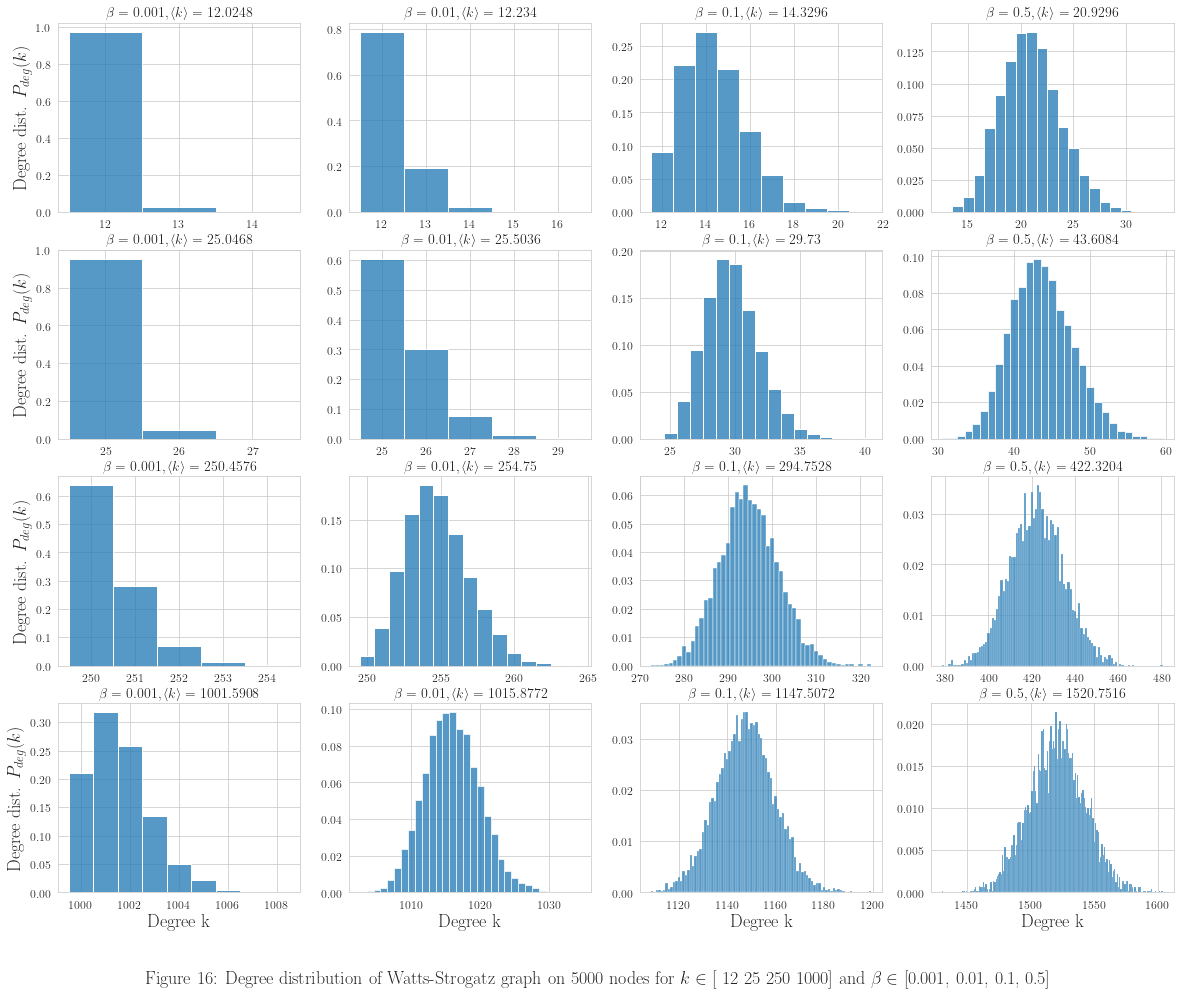

In [7]:

N = 5000
p = [0.005,0.01,0.1,0.4]
k = N*np.array(p)
k = k.astype(int)//2
beta = [0.001,0.01, 0.1, 0.5]

folder_path = 'networks/'
graph_name = 'watts_strogatz_k_{}_beta_{:.6f}.txt'


latex_plot(fontsize=18)
fig, ax = plt.subplots(4, 4, figsize=(20, 16))

for i in range(4):
    for j in range(4):
        G = nx.read_adjlist(folder_path + graph_name.format(k[i],beta[j]), nodetype=int)
        Gnk = nk.nxadapter.nx2nk(G)
        deg = nk.centrality.DegreeCentrality(Gnk)
        deg.run()
        degrees = np.array(deg.scores())
        avg_degree = np.mean(degrees)
        sb.histplot(degrees, ax=ax[i,j], stat='probability', discrete=True)
        if j == 0:
            ax[i,j].set_ylabel('Degree dist. $P_{deg}(k)$')
        else:
            ax[i,j].set_ylabel('')
        if i == 3 :
            ax[i,j].set_xlabel('Degree k')
            
        ax[i,j].set_title(r'$\beta = {}, \langle k \rangle = {}$'.format(beta[j], avg_degree), fontsize=14)
        # ax[i,j].text(0.7,0.7, "p = {}".format(p[i]), transform=ax[i,j].transAxes)
        # ax[i,j].text(0.7,0.6, r"$\beta = {}$".format(beta[j]), transform=ax[i,j].transAxes)
        # ax[i,j].text(0.7,0.5, r"$\langle k \rangle$ = {:.2f}".format(avg_degree), transform=ax[i,j].transAxes)
plt.text(0.5, 0.05, r'Figure 16: Degree distribution of Watts-Strogatz graph on {} nodes for $k \in$ {} and $\beta \in $ {}'.format(N,k,beta), ha='center', va='center', transform=fig.transFigure)
plt.show()

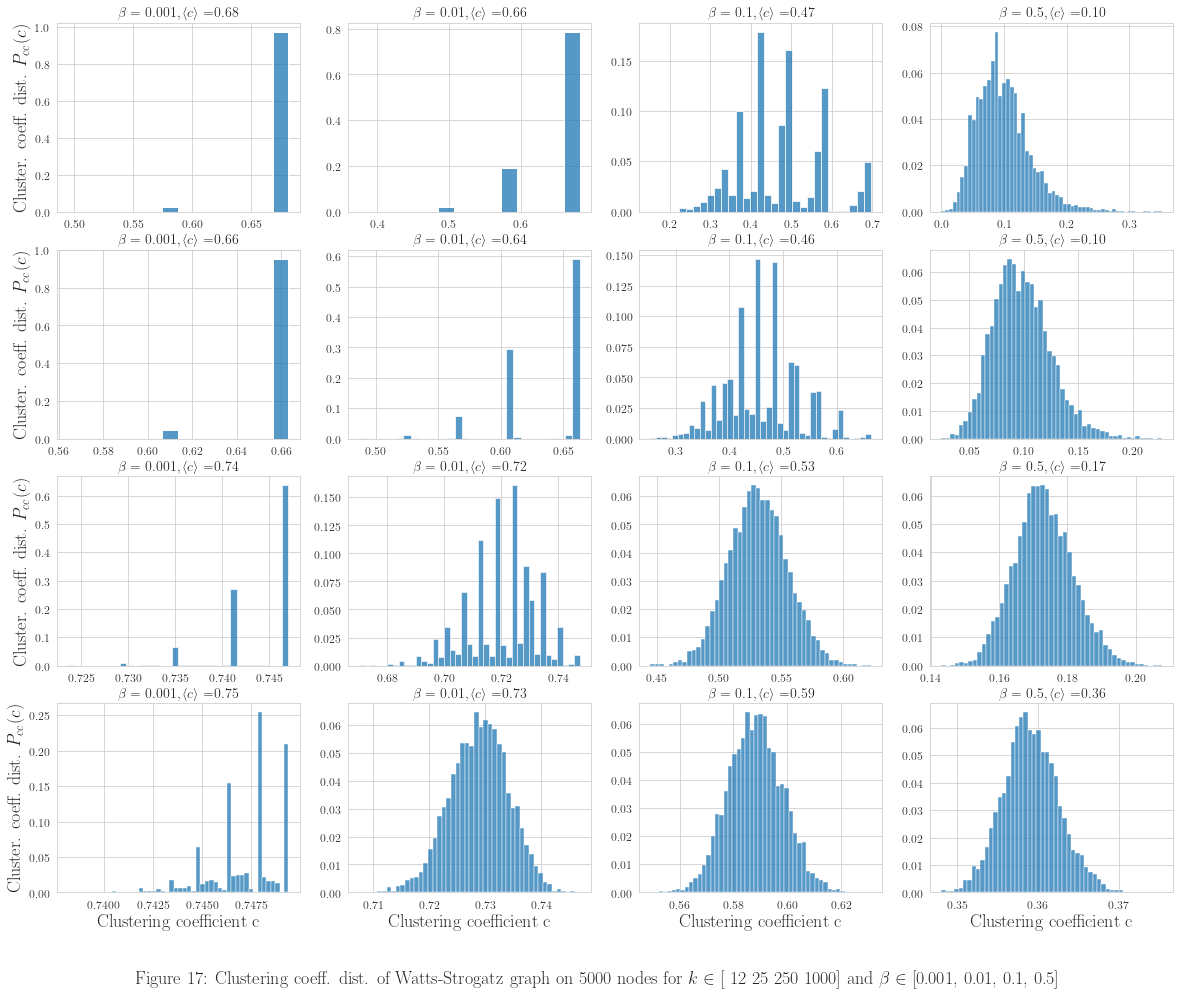

In [9]:

N = 5000
p = [0.005,0.01,0.1,0.4]
k = N*np.array(p)
k = k.astype(int)//2
beta = [0.001,0.01, 0.1, 0.5]

latex_plot(fontsize=18)
fig, ax = plt.subplots(4, 4, figsize=(20, 16))

for i in range(4):
    for j in range(4):
        G = nx.read_adjlist(folder_path + graph_name.format(k[i],beta[j]), nodetype=int)
        Gnk = nk.nxadapter.nx2nk(G)
        lcc = nk.centrality.LocalClusteringCoefficient(Gnk, turbo=True)
        lcc.run()
        cc = np.array(lcc.scores())
        true_avg_cc = np.mean(cc)
        sb.histplot(cc, ax=ax[i,j], stat='probability')
        if j == 0:
            ax[i,j].set_ylabel('Cluster. coeff. dist. $P_{cc}(c)$')
        else:
            ax[i,j].set_ylabel('')
        if i == 3 :
            ax[i,j].set_xlabel('Clustering coefficient c')
            
        ax[i,j].set_title(r'$\beta = {}, \langle c \rangle = ${:.2f}'.format(beta[j], true_avg_cc), fontsize=14)
        # ax[i,j].text(0.7,0.7, "p = {}".format(p[i]), transform=ax[i,j].transAxes)
        # ax[i,j].text(0.7,0.6, r"$\beta = {}$".format(beta[j]), transform=ax[i,j].transAxes)
        # ax[i,j].text(0.7,0.5, r"$\langle k \rangle$ = {:.2f}".format(avg_degree), transform=ax[i,j].transAxes)
plt.text(0.5, 0.05, r'Figure 17: Clustering coeff. dist. of Watts-Strogatz graph on {} nodes for $k \in$ {} and $\beta \in $ {}'.format(N,k,beta), ha='center', va='center', transform=fig.transFigure)
plt.show()

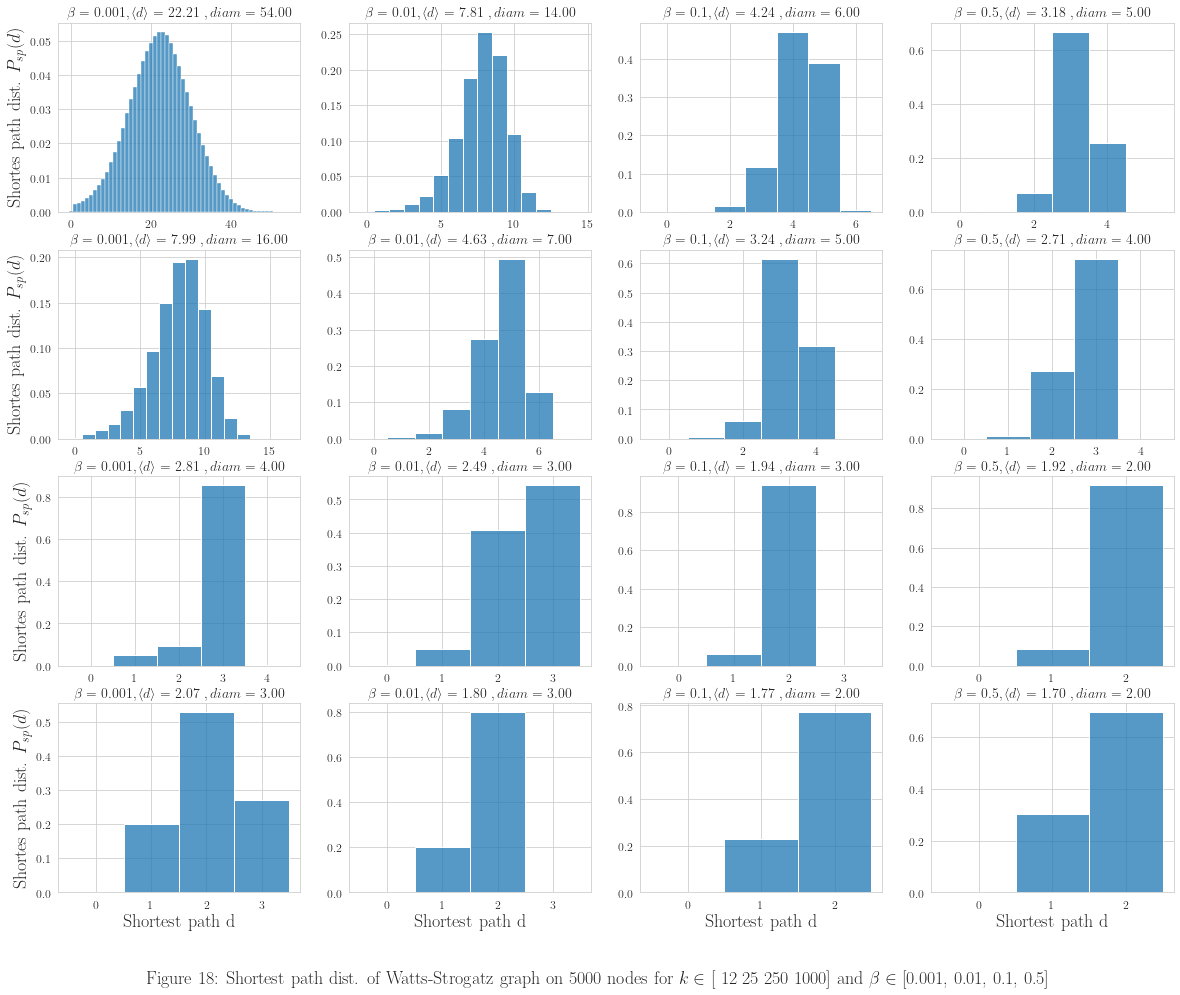

In [10]:

N = 5000
p = [0.005,0.01,0.1,0.4]
k = N*np.array(p)
k = k.astype(int)//2
beta = [0.001,0.01, 0.1, 0.5]

latex_plot(fontsize=18)
fig, ax = plt.subplots(4, 4, figsize=(20, 16))

for i in range(4):
    for j in range(4):
        G = nx.read_adjlist(folder_path + graph_name.format(k[i],beta[j]), nodetype=int)
        Gnk = nk.nxadapter.nx2nk(G)
        shortest_paths_alg = nk.distance.APSP(Gnk)
        shortest_paths_alg.run()
        shortest_paths = shortest_paths_alg.getDistances(asarray=True)
        shortest_paths = shortest_paths[shortest_paths != np.inf]
        # shortest_paths = shortest_paths.astype(int)
        true_avg_sp = np.mean(shortest_paths)
        diameter = np.max(shortest_paths)
        # labels, counts = np.unique(shortest_paths.flatten(), return_counts=True)
        # # bins = np.arange(0, np.max(shortest_paths)+1)
        sb.histplot(shortest_paths, ax=ax[i,j], stat='probability', discrete=True)
        # ax[i,j].bar(labels, counts/np.sum(counts), align='center', width=0.8)
        # ax[i,j].set_xticks(labels)
        if j == 0:
            ax[i,j].set_ylabel('Shortes path dist. $P_{sp}(d)$')
        else:
            ax[i,j].set_ylabel('')
        if i == 3 :
            ax[i,j].set_xlabel('Shortest path d')
            
        ax[i,j].set_title(r'$\beta = {}, \langle d \rangle = $ {:.2f} $, diam = $ {:.2f}'.format(beta[j], true_avg_sp.round(2), int(diameter)), fontsize=14)
        # ax[i,j].text(0.7,0.7, "p = {}".format(p[i]), transform=ax[i,j].transAxes)
        # ax[i,j].text(0.7,0.6, r"$\beta = {}$".format(beta[j]), transform=ax[i,j].transAxes)
        # ax[i,j].text(0.7,0.5, r"$\langle k \rangle$ = {:.2f}".format(avg_degree), transform=ax[i,j].transAxes)
plt.text(0.5, 0.05, r'Figure 18: Shortest path dist. of Watts-Strogatz graph on {} nodes for $k \in$ {} and $\beta \in $ {}'.format(N,k,beta), ha='center', va='center', transform=fig.transFigure)
plt.show()